In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm
import seaborn as sns
from keras.datasets import mnist
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import precision_score, recall_score, f1_score

In [2]:
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()
print(train_images.shape,test_images.shape)

(60000, 28, 28) (10000, 28, 28)


In [3]:
print(train_images[0])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136
  175  26 166 255 247 127   0   0   0   0]
 [  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253
  225 172 253 242 195  64   0   0   0   0]
 [  0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251
   93  82  82  56  39   0   0   0   0   0]
 [  0   0   0   0   0   0   0  18 219 253 253 253 253 253 198 18

In [4]:
print(train_labels[0])

5


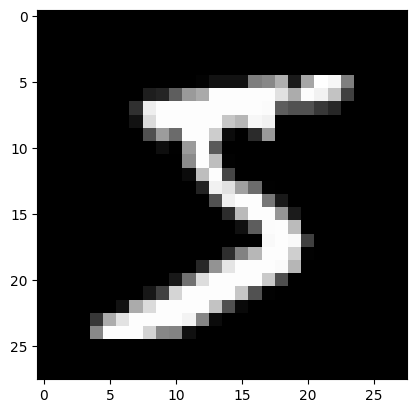

In [5]:
plt.imshow(train_images[0],cmap=plt.get_cmap('gray'))

In [6]:
train_images = train_images.reshape(60000, 28 * 28).astype('float32') / 255
test_images = test_images.reshape(10000, 28 * 28).astype('float32') / 255

# PCA

In [7]:
x_train, y_train = train_images[:7500], train_labels[:7500]
x_test, y_test = test_images[:2500], test_labels[:2500]

In [8]:
from sklearn.decomposition import PCA

pca = PCA(n_components=100)
pca_x_train = pca.fit_transform(x_train)
pca_y_train = y_train
pca_x_test = pca.transform(x_test)
pca_y_test = y_test

In [9]:
print(pca_x_train.shape,pca_x_test.shape)

(7500, 100) (2500, 100)


# 线性

In [10]:
#fit the model
linear_model=svm.SVC(kernel='linear',class_weight='balanced')
linear_model.fit(pca_x_train,pca_y_train)

SVC(class_weight='balanced', kernel='linear')

In [11]:
linear_predictions = linear_model.predict(pca_x_test)
print(classification_report(pca_y_test, linear_predictions))

              precision    recall  f1-score   support

           0       0.88      0.96      0.92       219
           1       0.94      0.98      0.96       287
           2       0.85      0.88      0.87       276
           3       0.87      0.91      0.89       254
           4       0.90      0.93      0.91       275
           5       0.88      0.83      0.85       221
           6       0.91      0.88      0.89       225
           7       0.91      0.86      0.89       257
           8       0.87      0.77      0.82       242
           9       0.86      0.85      0.85       244

    accuracy                           0.89      2500
   macro avg       0.89      0.88      0.88      2500
weighted avg       0.89      0.89      0.89      2500



In [12]:
linear_model.coef_

array([[ 0.53018955, -0.02605122,  0.05322848, ...,  0.0404354 ,
        -0.00499371,  0.01044427],
       [ 0.6912073 , -0.69227016,  0.17354924, ...,  0.0521981 ,
        -0.48233392,  0.60580743],
       [ 0.64761306, -0.36933803,  0.39421845, ...,  0.04603316,
         0.13489268, -0.036896  ],
       ...,
       [-0.68898949, -1.10995384, -0.10755701, ...,  0.41035976,
        -0.16568674, -0.13308698],
       [-0.38717728, -0.57538244, -0.26156877, ..., -0.40534196,
         0.13812481, -0.53594441],
       [-0.17059434,  1.67476941, -0.03311576, ...,  0.15627598,
        -0.10265292,  0.41301917]])

In [13]:
linear_model.intercept_

array([ 0.03900495, -0.91748413, -1.06935216, -0.21706613, -1.95034612,
       -0.08673365, -0.24169103, -1.80790025, -1.00630399, -1.46362613,
       -2.04307572, -1.13692246, -1.55729868, -0.3327526 , -1.41475475,
       -4.48040352, -0.29381783,  0.37369637,  0.83823142,  0.390693  ,
        1.75881974,  1.21317502, -0.96035765,  0.2370324 ,  1.49196304,
       -0.14724997,  1.02243101,  1.54728557, -0.81958617,  0.43364114,
       -0.32813215,  0.39161486, -0.74739582, -1.57244112, -0.56302357,
        2.01884304,  0.62984786, -1.03101854, -1.0057759 , -0.28811773,
       -2.13885164, -0.75219187, -1.40108314, -2.40788307,  0.47951353])

In [14]:
linear_model.support_vectors_

array([[ 0.54345608,  1.77971578, -2.66273594, ..., -0.130242  ,
        -0.15334322,  0.01158366],
       [ 1.46812153,  1.2482754 , -2.18307948, ..., -0.10310315,
         0.00367889,  0.45790282],
       [ 3.1238277 ,  1.09316087, -0.48124161, ...,  0.18150978,
         0.36298895,  0.11734504],
       ...,
       [-2.16911793, -1.10136437, -1.03449082, ..., -0.2391108 ,
         0.11173596,  0.02696334],
       [-2.7668097 ,  0.01127894,  1.06894088, ..., -0.05055377,
        -0.47148469, -0.08735754],
       [-2.15644765, -1.10682762, -1.63504434, ...,  0.15825103,
        -0.23976605, -0.0428071 ]])

[[211   0   1   0   0   3   3   0   0   1]
 [  0 280   1   1   0   1   3   0   1   0]
 [  3   3 244   4   3   1   5   4   7   2]
 [  2   1   6 230   1   6   1   3   3   1]
 [  0   0   4   0 256   0   2   1   1  11]
 [  5   0   1  11   1 183   3   0  13   4]
 [  9   2   5   0   3   5 198   1   2   0]
 [  1   4  15   0   5   0   0 221   0  11]
 [  7   4   9  11   4   8   3   5 186   5]
 [  2   4   2   6  13   2   0   7   1 207]]


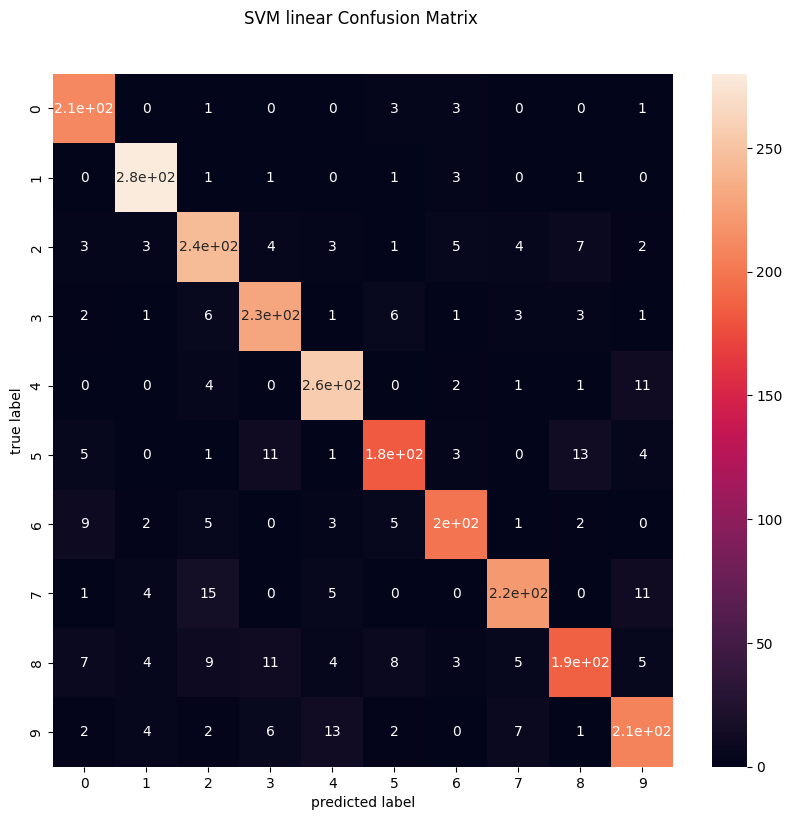

precision:0.886
recall:0.884
F1:0.884


In [33]:
# 混淆矩阵并可视化
linear_confmat = confusion_matrix(y_true=pca_y_test, y_pred=linear_predictions)  # 输出混淆矩阵
print(linear_confmat)
linear_fig, linear_ax = plt.subplots(figsize=(10, 9))

sns.heatmap(linear_confmat,annot=True,ax=linear_ax) #plot heatmap


linear_ax.set_title('SVM linear Confusion Matrix \n\n')
linear_ax.set_xlabel('predict')
linear_ax.set_ylabel('true') #

plt.xlabel('predicted label')
plt.ylabel('true label')
plt.show()
# 召回率、准确率、F1
print('precision:%.3f' % precision_score(y_true=y_test, y_pred=linear_predictions,average= 'macro'))
print('recall:%.3f' % recall_score(y_true=y_test, y_pred=linear_predictions,average= 'macro'))
print('F1:%.3f' % f1_score(y_true=y_test, y_pred=linear_predictions,average= 'macro'))

# 非线性

1. 用来选择映射到高维线性可分的核函数
2. linear: 线性核函数； 优点： 简单、运算效率高；缺点： 对线性不可分的数据集没有很好的效果
3. ploy: 多项式核函数； 优点： 可以拟合出复杂的分割超平面；缺点： 有三个参数，调参困难，且当n过大时，模型拟合时间会很长 ；
4. rbf: 径向基函数 通常定义为样本到数据中心之间径向距离（通常是欧氏距离）的单调函数（由于距离是径向同性的）； 相较于多项式核，具有参数少的优点
5. sigmoid：Logistic函数 也称为S型生长曲线，优点：平滑
6. precomputed：预训练好的核函数对应的Gram 矩阵 优点： 不用再次拟合核函数对应的Gram 矩阵，直接进行映射就可以了

In [16]:
#fit the model
rbf_model = svm.SVC(kernel='rbf', class_weight='balanced')
rbf_model.fit(pca_x_train, pca_y_train)

SVC(class_weight='balanced')

In [17]:
rbf_predictions = rbf_model.predict(pca_x_test)
print(classification_report(pca_y_test, rbf_predictions))

              precision    recall  f1-score   support

           0       0.95      0.98      0.96       219
           1       0.96      0.99      0.97       287
           2       0.93      0.93      0.93       276
           3       0.94      0.94      0.94       254
           4       0.95      0.96      0.96       275
           5       0.95      0.95      0.95       221
           6       0.93      0.95      0.94       225
           7       0.94      0.89      0.92       257
           8       0.95      0.93      0.94       242
           9       0.93      0.91      0.92       244

    accuracy                           0.94      2500
   macro avg       0.94      0.94      0.94      2500
weighted avg       0.94      0.94      0.94      2500



[[211   0   1   0   0   3   3   0   0   1]
 [  0 280   1   1   0   1   3   0   1   0]
 [  3   3 244   4   3   1   5   4   7   2]
 [  2   1   6 230   1   6   1   3   3   1]
 [  0   0   4   0 256   0   2   1   1  11]
 [  5   0   1  11   1 183   3   0  13   4]
 [  9   2   5   0   3   5 198   1   2   0]
 [  1   4  15   0   5   0   0 221   0  11]
 [  7   4   9  11   4   8   3   5 186   5]
 [  2   4   2   6  13   2   0   7   1 207]]


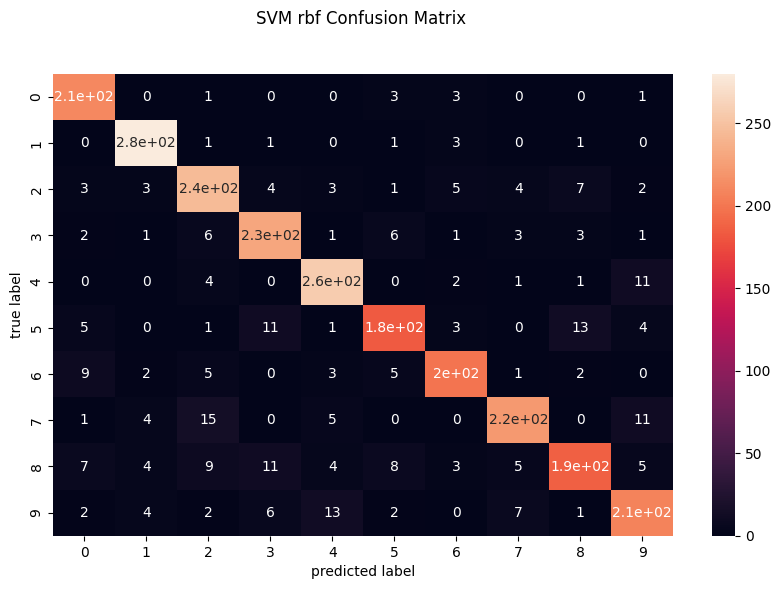

precision:0.944
recall:0.944
F1:0.944


In [35]:
# 混淆矩阵并可视化
rbf_confmat = confusion_matrix(y_true=pca_y_test, y_pred=rbf_predictions)  # 输出混淆矩阵
print(rbf_confmat)
rbf_fig, rbf_ax = plt.subplots(figsize=(10, 6))

sns.heatmap(rbf_confmat,annot=True,ax=rbf_ax) #plot heatmap


rbf_ax.set_title('SVM rbf Confusion Matrix \n\n')
rbf_ax.set_xlabel('predict')
rbf_ax.set_ylabel('true') #

plt.xlabel('predicted label')
plt.ylabel('true label')
plt.show()
# 召回率、准确率、F1
print('precision:%.3f' % precision_score(y_true=y_test, y_pred=rbf_predictions,average= 'macro'))
print('recall:%.3f' % recall_score(y_true=y_test, y_pred=rbf_predictions,average= 'macro'))
print('F1:%.3f' % f1_score(y_true=y_test, y_pred=rbf_predictions,average= 'macro'))

In [18]:
#fit the model
poly_model = svm.SVC(kernel='poly', class_weight='balanced')
poly_model.fit(pca_x_train, pca_y_train)

SVC(class_weight='balanced', kernel='poly')

In [19]:
poly_predictions = poly_model.predict(pca_x_test)
print(classification_report(pca_y_test, poly_predictions))

              precision    recall  f1-score   support

           0       0.97      0.97      0.97       219
           1       0.98      0.98      0.98       287
           2       0.94      0.95      0.94       276
           3       0.94      0.94      0.94       254
           4       0.95      0.96      0.96       275
           5       0.94      0.96      0.95       221
           6       0.98      0.94      0.96       225
           7       0.95      0.89      0.92       257
           8       0.92      0.96      0.94       242
           9       0.92      0.93      0.92       244

    accuracy                           0.95      2500
   macro avg       0.95      0.95      0.95      2500
weighted avg       0.95      0.95      0.95      2500



[[213   0   1   0   0   3   1   0   0   1]
 [  0 281   1   2   1   1   1   0   0   0]
 [  2   0 261   1   1   0   2   5   4   0]
 [  0   0   0 239   0   6   0   4   3   2]
 [  0   0   1   0 265   0   1   0   1   7]
 [  0   0   0   3   2 213   0   1   2   0]
 [  2   2   1   1   4   1 211   0   3   0]
 [  0   3  10   2   2   1   0 228   0  11]
 [  2   0   1   4   1   1   0   1 232   0]
 [  1   1   1   3   3   1   0   1   6 227]]


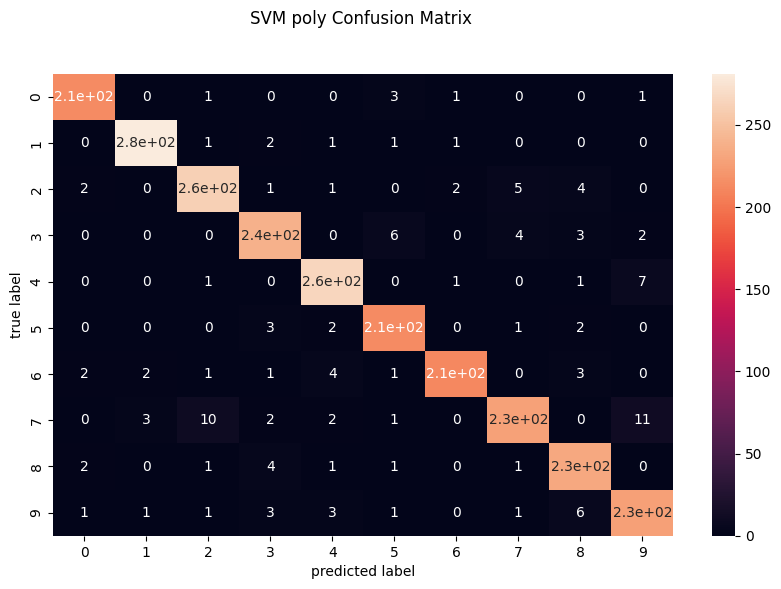

precision:0.948
recall:0.948
F1:0.948


In [37]:
# 混淆矩阵并可视化
poly_confmat = confusion_matrix(y_true=pca_y_test, y_pred=poly_predictions)  # 输出混淆矩阵
print(poly_confmat)
poly_fig, poly_ax = plt.subplots(figsize=(10, 6))

sns.heatmap(poly_confmat,annot=True,ax=poly_ax) #plot heatmap


poly_ax.set_title('SVM poly Confusion Matrix \n\n')
poly_ax.set_xlabel('predict')
poly_ax.set_ylabel('true') #

plt.xlabel('predicted label')
plt.ylabel('true label')
plt.show()
# 召回率、准确率、F1
print('precision:%.3f' % precision_score(y_true=y_test, y_pred=poly_predictions,average= 'macro'))
print('recall:%.3f' % recall_score(y_true=y_test, y_pred=poly_predictions,average= 'macro'))
print('F1:%.3f' % f1_score(y_true=y_test, y_pred=poly_predictions,average= 'macro'))

In [20]:
#fit the model
sigmoid_model = svm.SVC(kernel='sigmoid', class_weight='balanced')
sigmoid_model.fit(pca_x_train, pca_y_train)

SVC(class_weight='balanced', kernel='sigmoid')

In [21]:
sigmoid_predictions = sigmoid_model.predict(pca_x_test)
print(classification_report(pca_y_test, sigmoid_predictions))

              precision    recall  f1-score   support

           0       0.87      0.95      0.91       219
           1       0.94      0.97      0.95       287
           2       0.88      0.83      0.85       276
           3       0.86      0.82      0.84       254
           4       0.86      0.88      0.87       275
           5       0.75      0.83      0.79       221
           6       0.91      0.87      0.89       225
           7       0.88      0.83      0.86       257
           8       0.83      0.75      0.79       242
           9       0.77      0.83      0.80       244

    accuracy                           0.86      2500
   macro avg       0.86      0.86      0.85      2500
weighted avg       0.86      0.86      0.86      2500



[[208   0   1   0   1   6   3   0   0   0]
 [  0 278   1   0   0   0   4   0   4   0]
 [  6   4 229   3   6   1   4   5  14   4]
 [  1   0   3 208   1  25   1   6   6   3]
 [  0   0   1   0 243   0   4   3   0  24]
 [  6   1   0  15   3 183   3   1   6   3]
 [  8   2   6   0   6   6 196   0   1   0]
 [  1   4  12   0   7   1   0 214   1  17]
 [  5   4   6  10   6  18   1   3 181   8]
 [  3   3   1   7   9   4   0  11   4 202]]


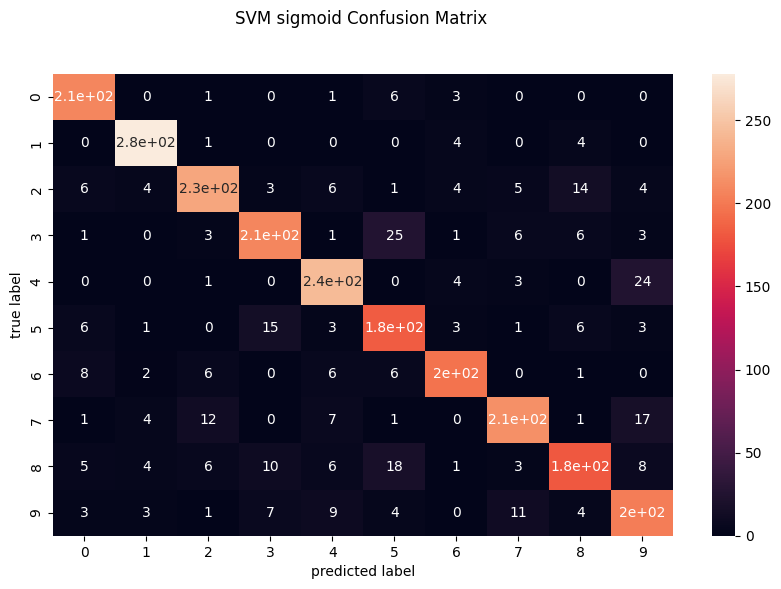

precision:0.856
recall:0.856
F1:0.855


In [38]:
# 混淆矩阵并可视化
sigmoid_confmat = confusion_matrix(y_true=pca_y_test, y_pred=sigmoid_predictions)  # 输出混淆矩阵
print(sigmoid_confmat)
sigmoid_fig, sigmoid_ax = plt.subplots(figsize=(10, 6))

sns.heatmap(sigmoid_confmat,annot=True,ax=sigmoid_ax) #plot heatmap


sigmoid_ax.set_title('SVM sigmoid Confusion Matrix \n\n')
sigmoid_ax.set_xlabel('predict')
sigmoid_ax.set_ylabel('true') #

plt.xlabel('predicted label')
plt.ylabel('true label')
plt.show()
# 召回率、准确率、F1
print('precision:%.3f' % precision_score(y_true=y_test, y_pred=sigmoid_predictions,average= 'macro'))
print('recall:%.3f' % recall_score(y_true=y_test, y_pred=sigmoid_predictions,average= 'macro'))
print('F1:%.3f' % f1_score(y_true=y_test, y_pred=sigmoid_predictions,average= 'macro'))

# 调参

In [22]:
param_grid={'C':[0.1,1,5,10,100],
            'gamma':[0.0005,0.001,0.005,0.01],}
parameter_model = GridSearchCV(svm.SVC(kernel='rbf', class_weight='balanced'), param_grid)
parameter_model.fit(pca_x_train,pca_y_train)
print(parameter_model.best_estimator_)#打印最好的参数

SVC(C=5, class_weight='balanced', gamma=0.01)


In [23]:
parameter_predictions=parameter_model.predict(pca_x_test)
print(classification_report(pca_y_test,parameter_predictions))

              precision    recall  f1-score   support

           0       0.93      0.98      0.96       219
           1       0.97      0.99      0.98       287
           2       0.94      0.94      0.94       276
           3       0.93      0.94      0.93       254
           4       0.95      0.95      0.95       275
           5       0.95      0.94      0.95       221
           6       0.93      0.95      0.94       225
           7       0.94      0.91      0.92       257
           8       0.96      0.92      0.94       242
           9       0.92      0.92      0.92       244

    accuracy                           0.94      2500
   macro avg       0.94      0.94      0.94      2500
weighted avg       0.94      0.94      0.94      2500



In [24]:
param_grid_1={'C':[4,5,6],
            'gamma':[0.007,0.01,0.013],}
parameter_model_1 = GridSearchCV(svm.SVC(kernel='rbf', class_weight='balanced'), param_grid)
parameter_model_1.fit(pca_x_train,pca_y_train)
print(parameter_model_1.best_estimator_)#打印最好的参数

SVC(C=5, class_weight='balanced', gamma=0.01)


In [25]:
parameter_predictions_1=parameter_model.predict(pca_x_test)
print(classification_report(pca_y_test,parameter_predictions_1))

              precision    recall  f1-score   support

           0       0.93      0.98      0.96       219
           1       0.97      0.99      0.98       287
           2       0.94      0.94      0.94       276
           3       0.93      0.94      0.93       254
           4       0.95      0.95      0.95       275
           5       0.95      0.94      0.95       221
           6       0.93      0.95      0.94       225
           7       0.94      0.91      0.92       257
           8       0.96      0.92      0.94       242
           9       0.92      0.92      0.92       244

    accuracy                           0.94      2500
   macro avg       0.94      0.94      0.94      2500
weighted avg       0.94      0.94      0.94      2500



[[214   0   1   0   0   2   2   0   0   0]
 [  0 283   1   0   0   0   3   0   0   0]
 [  4   0 259   0   1   0   3   4   2   3]
 [  0   0   2 238   0   5   1   6   1   1]
 [  1   0   1   0 262   0   3   0   0   8]
 [  2   0   0   5   1 208   2   1   2   0]
 [  3   2   0   0   3   1 214   0   2   0]
 [  0   4   8   3   2   0   0 234   0   6]
 [  3   1   2   7   2   0   1   2 223   1]
 [  2   1   1   4   5   2   0   3   2 224]]


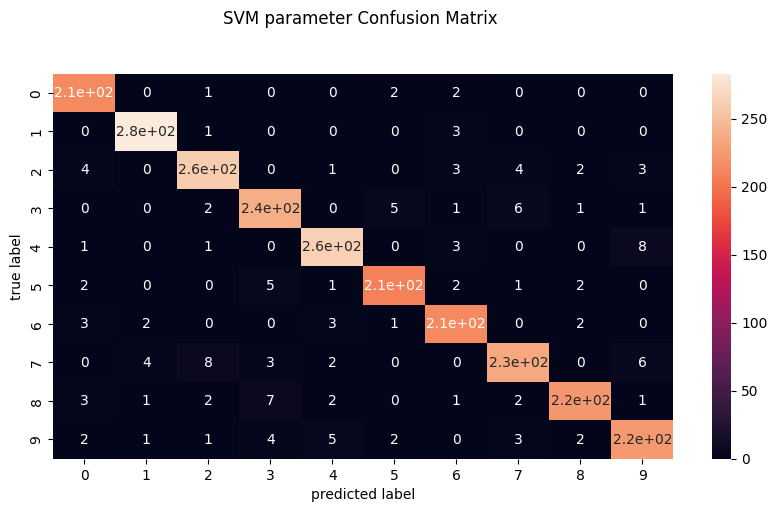

precision:0.943
recall:0.943
F1:0.943


In [42]:
# 混淆矩阵并可视化
parameter_confmat = confusion_matrix(y_true=pca_y_test, y_pred=parameter_predictions_1)  # 输出混淆矩阵
print(parameter_confmat)
parameter_fig, parameter_ax = plt.subplots(figsize=(10, 5))

sns.heatmap(parameter_confmat,annot=True,ax=parameter_ax) #plot heatmap


parameter_ax.set_title('SVM parameter Confusion Matrix \n\n')
parameter_ax.set_xlabel('predict')
parameter_ax.set_ylabel('true') #

plt.xlabel('predicted label')
plt.ylabel('true label')
plt.show()
# 召回率、准确率、F1
print('precision:%.3f' % precision_score(y_true=y_test, y_pred=parameter_predictions_1,average= 'macro'))
print('recall:%.3f' % recall_score(y_true=y_test, y_pred=parameter_predictions_1,average= 'macro'))
print('F1:%.3f' % f1_score(y_true=y_test, y_pred=parameter_predictions_1,average= 'macro'))

完